<a href="https://colab.research.google.com/github/ashkanmulla/ExcelR-Assignment/blob/main/Assignment_Fraud_Check_Decision_Trees%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Fraud Check - Decision Trees

Use Decision Trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

df = pd.read_csv("Fraud_check.csv")

In [2]:
#Viewing top 5 rows of dataframe
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [4]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [5]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [6]:
print(df)

     Taxable.Income  City.Population  ...  Urban_YES  TaxInc
0             68833            50047  ...          1    Good
1             33700           134075  ...          1    Good
2             36925           160205  ...          1    Good
3             50190           193264  ...          1    Good
4             81002            27533  ...          0    Good
..              ...              ...  ...        ...     ...
595           76340            39492  ...          1    Good
596           69967            55369  ...          1    Good
597           47334           154058  ...          1    Good
598           98592           180083  ...          0    Good
599           96519           158137  ...          0    Good

[600 rows x 8 columns]


# Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [7]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [8]:
#Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


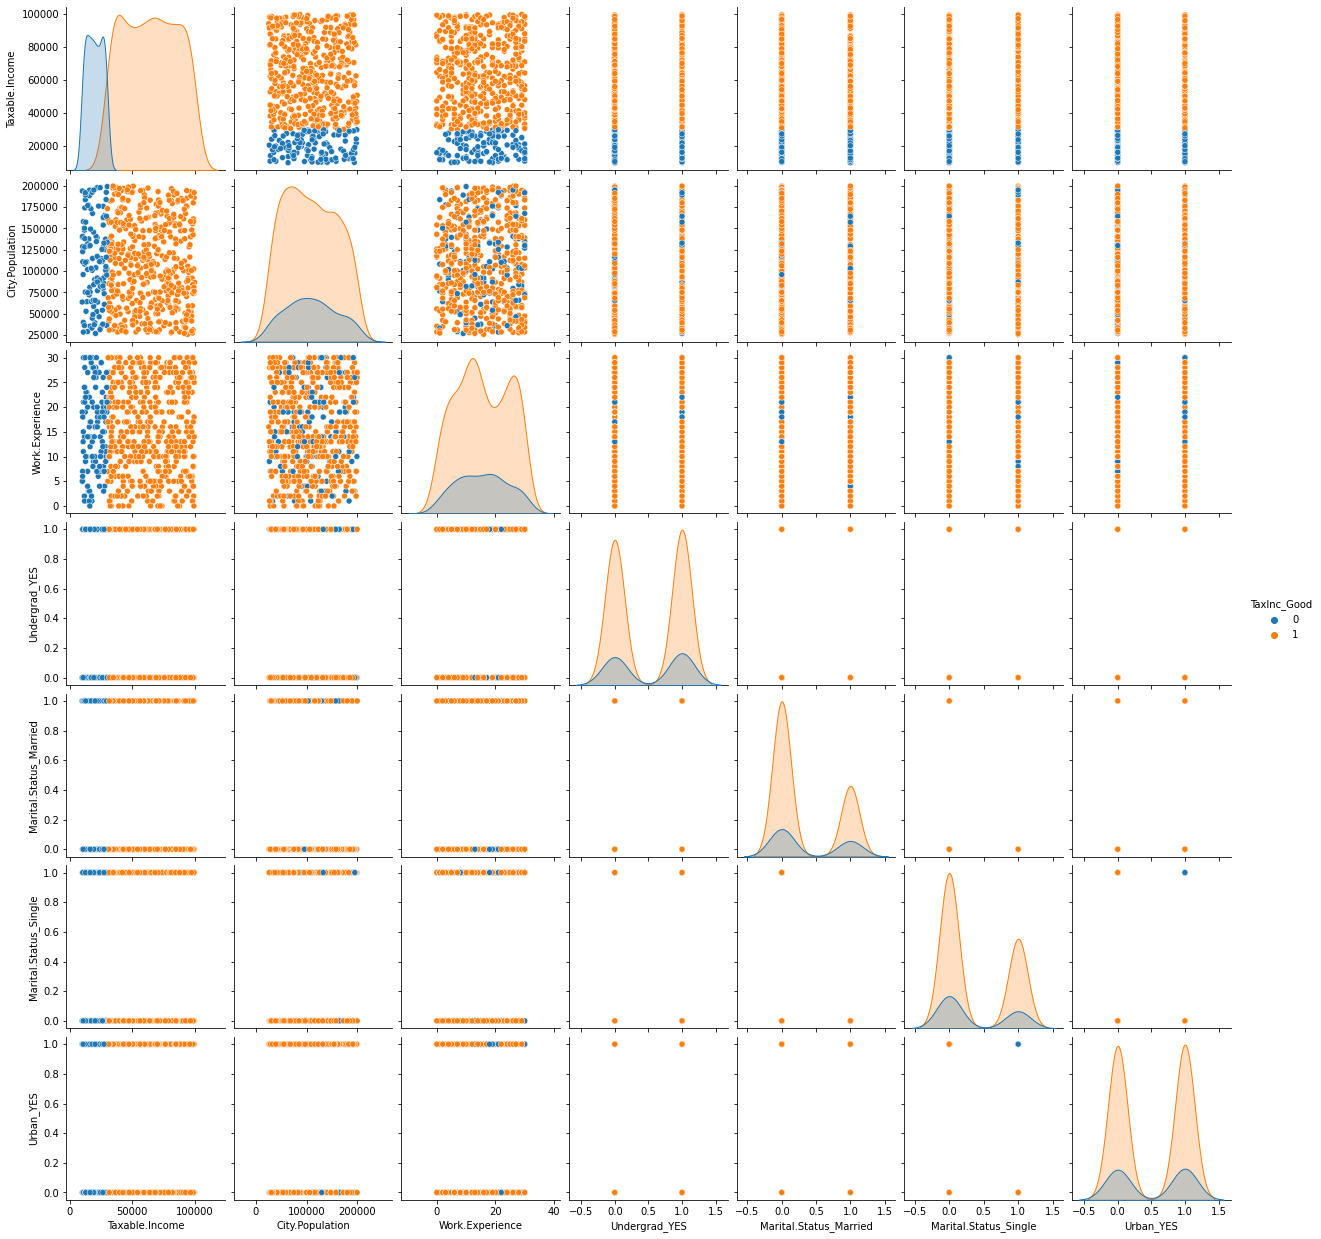

In [9]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [10]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [12]:
# Declaring features & target
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Splitting data into train & test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
##Converting the Taxable income variable to bucketing. 
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [16]:
##Droping the Taxable income variable
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [17]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)
## As we are getting error as "ValueError: could not convert string to float: 'YES'".
## Model.fit doesnt not consider String. So, we encode

In [18]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [19]:
##Splitting the data into featuers and labels
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [20]:
## Collecting the column names
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]
##Splitting the data into train and test

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [22]:
##Model building
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [23]:
model.estimators_
model.classes_
model.n_features_
model.n_classes_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


2

In [24]:
model.n_outputs_

1

In [25]:
model.oob_score_
###74.7833%

0.5145833333333333

In [26]:
##Predictions on train data
prediction = model.predict(x_train)

In [27]:
##Accuracy
# For accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)
##98.33%

In [28]:
np.mean(prediction == y_train)
##98.33%

0.99375

In [29]:
##Confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [30]:
##Prediction on test data
pred_test = model.predict(x_test)

In [31]:
##Accuracy
acc_test =accuracy_score(y_test,pred_test)
##78.333%

In [32]:
## In random forest we can plot a Decision tree present in Random forest
from sklearn.tree import export_graphviz
import pydotplus
from six import StringIO

In [33]:
tree = model.estimators_[5]

In [34]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [35]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Building Decision Tree Classifier using Entropy Criteria

In [36]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
from sklearn import tree

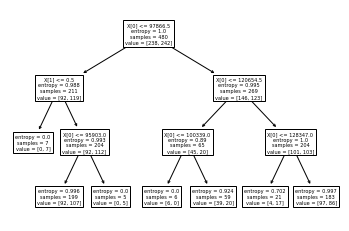

In [38]:
#PLot the decision tree
tree.plot_tree(model);

In [39]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

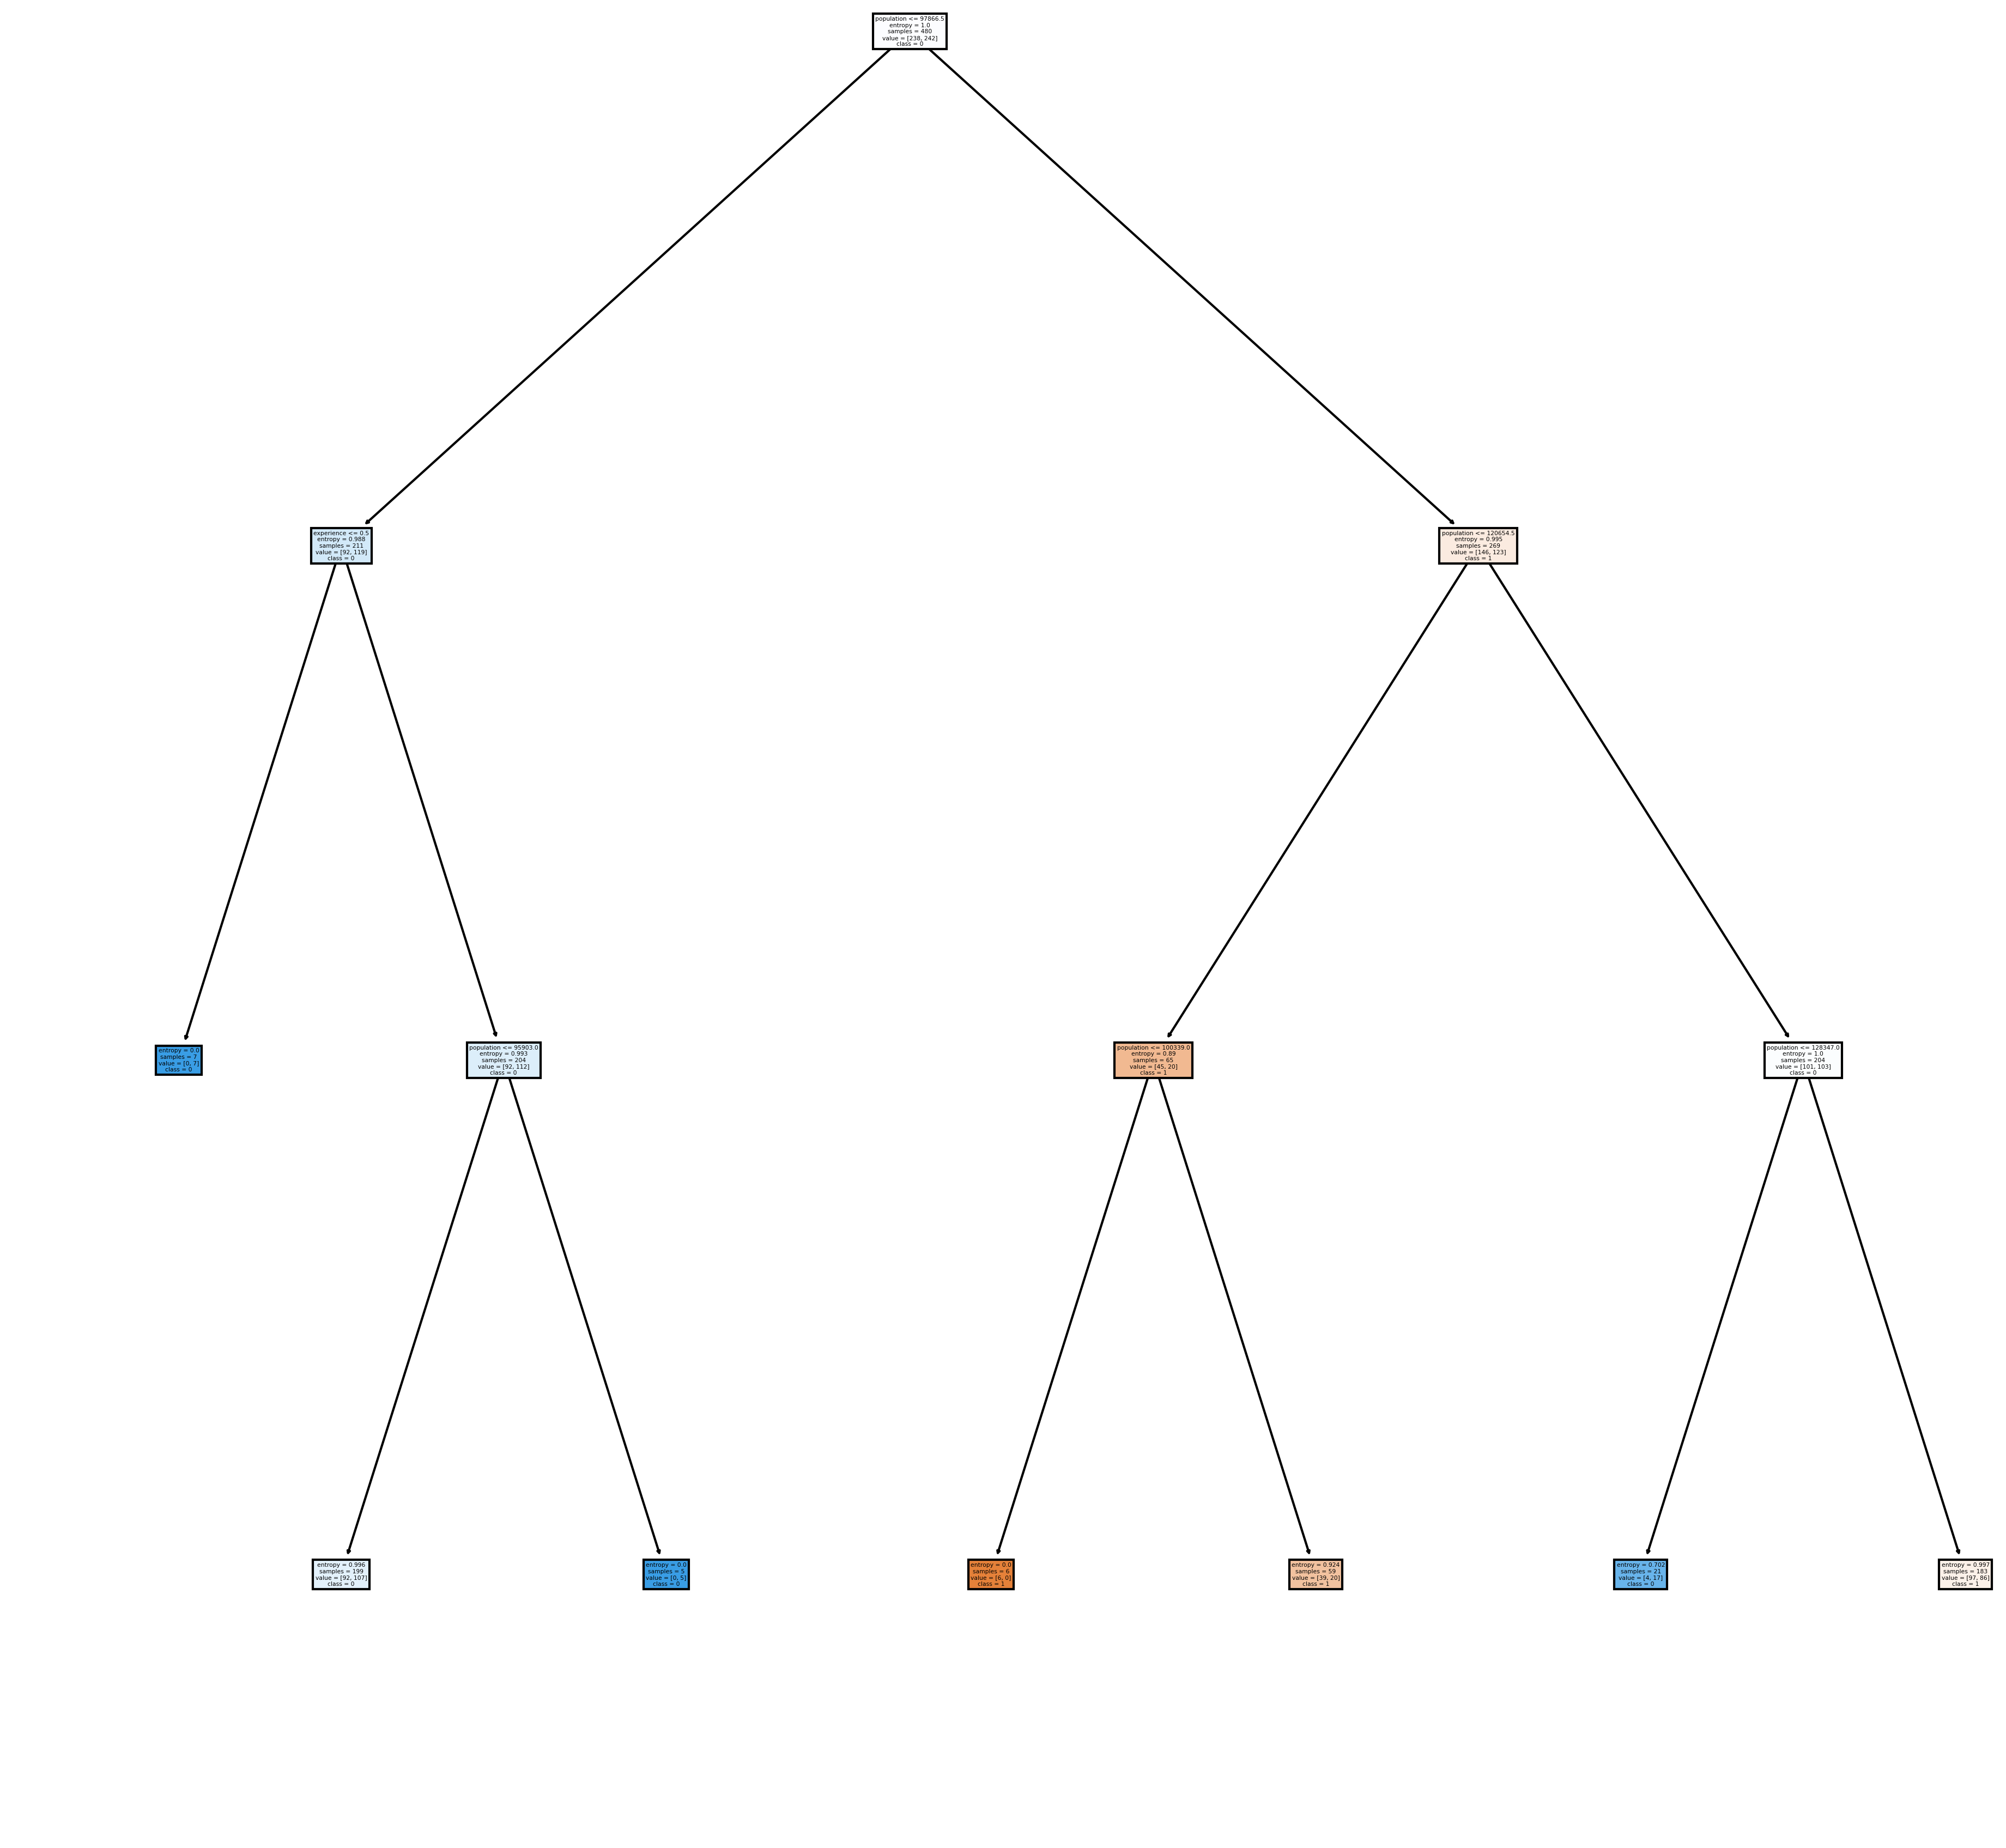

In [40]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [41]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    62
0    58
dtype: int64

In [42]:
preds

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=uint8)

In [43]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Urban_YES,,
0,30,30
1,28,32


In [44]:
# Accuracy 
np.mean(preds==y_test)

0.5166666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [46]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [47]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5166666666666667

# Decision Tree Regression Example

In [48]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [49]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [51]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [52]:
#Find the accuracy
model.score(X_test,y_test)

-0.8701026119402988